# Project 3 Report

## Team members: Joseph Ditton, Supratik Chanda

## INTRODUCTION

## Dataset


# Analysis technique:

### We performed five analyses,each of whose description is given in the introduction

### Is Game Of thrones Season 8 in the path of becoming the highest liked season of all times among these four series? 
### Did Flash really became the least likely appreciated series among the above four TV Series?
### IS Marvel's Daredevil  catching a constant and high percentage of liked viewers? Or is the appeal of the series is going down day by day?
### Will there be a chance of Flash Season 6 on it's way?

##### Analysis by : Supratik Chanda

INFERENCE:
ARROW: Season 2 and Season 7 are the most liked series and Season 4 is the worst of all. Probably may be the content.
DAREDEVIL: All seasons are upto mark .Season 2 is slightly less liked but rest two seasons are far intricately watched
FLASH: Season 1 as usual is the best of the lot and Season 4 is the less liked series among all
Game of Thrones: Phew! All seasons are above par. But , Season 3 and 4 is the best of the lot. A little ahead of the others, but
if I may say,Season 8 is already the highest rated among all the other seasons.. But wait ,Game of thrones is the best overall rated TV Series among the four .Wait and watch!!!!!!
Since FLash Season 5 is highly liked by the audience, we may see Season 6 soon!

#### Which Genre have how much audeince score in the Best 100 Movies from 2018?

##### Analysis by Supratik Chanda:
We found out that the genre: Drama, Documentary ,mystery and suspense is the highly rated or watched by the peoples. Comedy is also another genre that the audience has liked variably but  not as highly as Drama or Documentary. Horror doesn't go well with the common audience.  An interesting note to be taken is that fiction and science related stories also attract a bunch of audience .

####  Which Movie studio has got the greatest amount of audience_response?

##### Analysis by Supratik Chanda

we have found out that overall Walt Disney pictures have been widely appreciated by a large chunk of audience. Universal pictures has also got pretty good appreciation by the audience in the year of 2017 and 2018! May be it's because of the Jurassic  World! In the last 3 years , Warner Bros  is also getting a lot of audience appreciation . Let's hope we see moe DC . But What we found out that Marvel Studios is not catching up . I don't know why but they have not been able to get a large variety audience poll.

# NOTE : TTest and Outcomes are in the code. 








## Results

Analysis 1:

<img src='Movie_Review_1.png' style='height:700px'>


Analysis 2: 

<img src='Movie_Review_2.png' style='height:800px'>

Analysis 3: 

<img src='Movie_Review_3.png' style='height:1800px'>



# ANALYSIS of MOST POPULAR TV Series through Web scraping ROTTEN TOMATOES : ARROW,DAREDEVIL,FLASH,GAME OF THRONES
### FUN FACTS!!!!!!
### Just an  analysis to find some details about four premier action/Sci-fi TV series 
### Is Game Of thrones Season 8 in the path of becoming the highest liked season of all times among these four series? 
### Did Flash really became the least likely appreciated series among the above four TV Series?
### IS Marvel's Daredevil  catching a constant and high percentage of liked viewers? Or is the appeal of the series is going down day by day?
### Will there be a chance of Flash Season 6 on it's way?



In [55]:
import requests
import re
from bs4 import BeautifulSoup as BS
def comicseries(c,ind):
    fl = str('flash')
    marvelHeroes = ['arrow','daredevil',fl,'game_of_thrones']
    rotTomtoes = requests.get('https://www.rottentomatoes.com/tv/' + str(marvelHeroes[ind]) +'/s0'+ str(c))
    Text = BS(rotTomtoes.text,'html5lib')
    c+=1
    return Text
    

In [56]:
import json,re,pandas as pd
from IPython.display import display
finalDT= pd.DataFrame()
end=False
count=1
filmNo=1
ind=0
audienceScore=pd.Series()
tvshowName = pd.Series()
DTFrame=pd.DataFrame()
tvSeriesNo =pd.Series()
while end == False:
    if str(comicseries(count,ind)).find('Sorry, please try again later.') != -1:
        ind+=1
        count=1
        if ind >3:
            break
        continue
    if ind ==3 and count==8:
        show = comicseries(count,ind).find('a',attrs={'id':'tvPosterLink'}).text.replace('\n','').strip()
        tvshowName = tvshowName.append(pd.Series(show))
        tvSeriesNo = tvSeriesNo.append(pd.Series('Season No: '+ str(count)))
        k = comicseries(count,ind).find('div',attrs={'class':'meter-value superPageFontColor'}).find('span',attrs={'class':'superPageFontColor'}).text
        audienceScore = audienceScore.append(pd.Series(k))
        break
    else:
        show = comicseries(count,ind).find('a',attrs={'id':'tvPosterLink'}).text.replace('\n','').strip()
        tvshowName = tvshowName.append(pd.Series(show))
        tvSeriesNo = tvSeriesNo.append(pd.Series('Season No: '+ str(count)))
        k = comicseries(count,ind).find('div',attrs={'class':'meter-value'}).find('span',attrs={'class':'superPageFontColor'}).text
        audienceScore = audienceScore.append(pd.Series(k))
    count+=1
DTFrame =pd.concat([tvSeriesNo,tvshowName,audienceScore],axis=1)
DTFrame.reset_index(drop=True,inplace=True)
DTFrame.columns=['Series Number','TV_Series_Name','AudienceScore']
DTFrame['AudienceScore']= DTFrame['AudienceScore'].replace('%','',regex=True)
DTFrame['AudienceScore'] = DTFrame['AudienceScore'].astype('int')



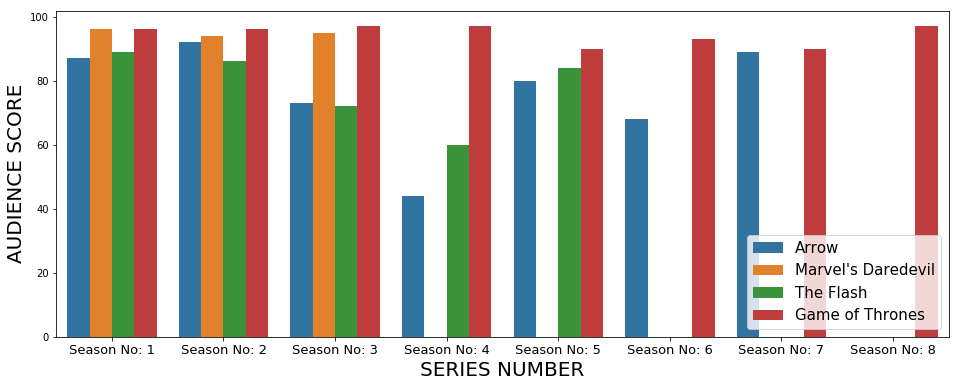

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
sns.barplot(x=DTFrame['Series Number'],y=DTFrame['AudienceScore'],hue=DTFrame['TV_Series_Name'])
plt.legend(loc='lower right',fontsize=15)
plt.xlabel('SERIES NUMBER',fontsize=20)
plt.ylabel('AUDIENCE SCORE',fontsize=20)
plt.xticks(fontsize=13)
plt.savefig('Movie_Review_1.png')
plt.show()


# INFERENCE:
### ARROW: Season 2 and Season 7 are the most liked series and Season 4 is the worst of all. Probably may be the content.
### DAREDEVIL: All seasons are upto mark .Season 2 is slightly less liked but rest two seasons are far intricately  watched
### FLASH: Season 1 as usual is the best of the lot  and Season 4 is the less liked series among all

### Game of Thrones: Phew! All seasons are above par. But , Season 3 and 4 is the best of the lot. A little ahead of the  others, but 

### if I  may say,Season 8 is already the highest rated among all the other seasons..  But wait ,Game of thrones is the best overall rated TV Series among the four .Wait and watch!!!!!!

### Since FLash Season 5 is highly liked by the audience, we may see Season 6 soon!

# ANALYSIS 2: Which Genre  have how much audeince score  in the Best 100 Movies from 2018

In [58]:
import requests
import re,pandas as pd
from bs4 import BeautifulSoup as soup
from urllib import request
from collections import Counter
from IPython.display import display
def fn1():
    movieList = requests.get('https://www.rottentomatoes.com/top/bestofrt/?year=2018')
    text = soup(movieList.text,'html5lib')
    topMovies = text.find_all('a',attrs={'class':'unstyled articleLink','href':True})
    k = [('https://www.rottentomatoes.com' + each['href']) for each in topMovies if re.search('/m',str(each)) if re.search('^/m',each['href']) ]
    genreDTFrame=pd.DataFrame()
    genreList=[]
    AudienceScoreList=[]
    audi=[]
    for each in k:
        i=request.urlopen(each)
        result = soup(i,'html5lib')
        nameTag = result.find_all('div',attrs={'class':'meta-value'})
        audiScr = result.find('div',attrs={'class':'meter-value'}).find('span',attrs={'class':'superPageFontColor'}).text
        AudienceScoreList.append(audiScr.replace('%',''))
        [genreList.append(each.text.replace(' ','').replace('\n','')) for each in nameTag if str(each).find('genres')>-1]
    #print(genreList,type(genreList))
    return (AudienceScoreList,genreList)

    

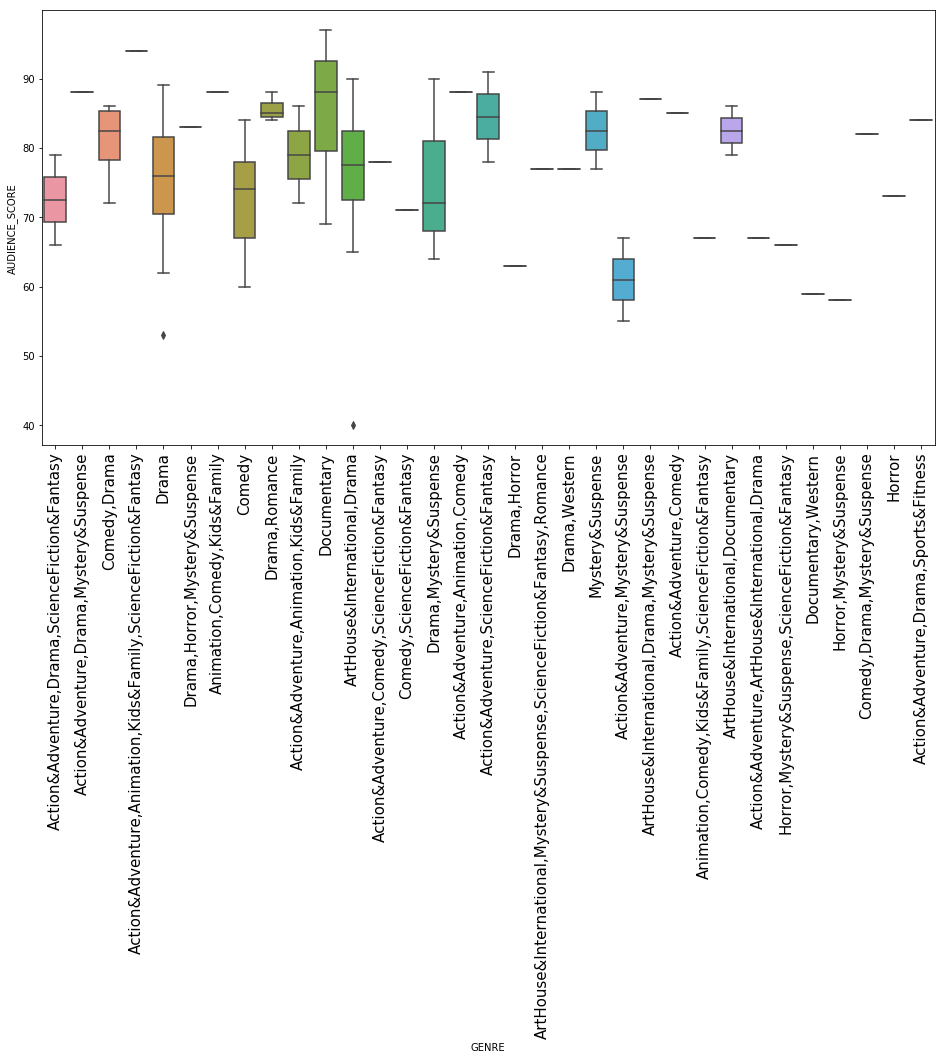

In [59]:
def fn2():
    import matplotlib.pyplot as plt
    import seaborn as sns
    from IPython.display import display
    audiscore,genre= fn1()
    audiPDSeries=pd.Series(audiscore)
    genrePDSeries = pd.Series(genre)
    DTFrame = pd.concat([genrePDSeries,audiPDSeries],axis=1)
    DTFrame.columns=['GENRE','AUDIENCE_SCORE']
    DTFrame.AUDIENCE_SCORE = DTFrame.AUDIENCE_SCORE.astype('int')
    #display(DTFrame)
    plt.figure(figsize=(16,8))
    sns.boxplot(x=DTFrame['GENRE'],y=DTFrame['AUDIENCE_SCORE'])
    plt.xticks(rotation=90,fontsize=15)
    plt.savefig('Movie_Review_2.png')
    plt.show()
fn2()

### The below analysis is made to find out the percentage of audience score for 'Marvel Studios','Paramount Pictures','Warner ros. Pictures ','Universal Pictures','Walt Disney Pictures' over a span from 2012 to 2018. We find out that people favour documentary and drama more than the other genres. While , it can also be said that a large number of audience score is also given for mystery and suspense

## Analysis: Which Movie studio has got the greatest amount of audience_response?

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup as sp
import requests
from IPython.display import display

In [65]:
def PlotSeries(year):
    rot = 'https://www.rottentomatoes.com'
    scrapedData= requests.get('https://www.rottentomatoes.com/top/bestofrt/?year='+year)
    #print(year)
    filmNames = sp(scrapedData.text,'html5lib')
    k = filmNames.find_all('a',attrs={'class':'unstyled articleLink'})
    nameList=[]
    totalDTFrame=pd.DataFrame()
    for each in k:
        if each['href'].startswith('/m'):
            nameList.append(rot+each['href'])
    StudioComparison=['Marvel Studios','Paramount Pictures','Warner Bros. Pictures','Universal Pictures','Walt Disney Pictures']
    AudienceScoreList=[]
    from urllib import request
    for each in nameList:
        Flag=False
        try:
            urlText = request.urlopen(each)
            soupText = sp(urlText,'html5lib')
        except:
            pass
        
        
        audiScr = soupText.find('div',attrs={'class':'meter-value'}).find('span',attrs={'class':'superPageFontColor'}).text
        DTFrame=pd.DataFrame()
        try:
            k = soupText.find('a',attrs={'target':'movie-studio'}).text.strip()
            j= soupText.find('h1',attrs={'class':'title hidden-xs'}).text.strip()
            #print(j)
            if k in StudioComparison:
               # print('kk1')
                tempMovieStudio=pd.DataFrame([k])
                tempAudiScore = pd.DataFrame([audiScr])
                DTFrame=pd.concat([tempMovieStudio,tempAudiScore],axis=1)
                #display(DTFrame)
                Flag=True
        except: 
            j=soupText.find('div',attrs={'class':'meta-value'}).text.replace(' ','')
            if j in StudioComparison:
                #print('kk2')
                tempMovieStudio=pd.DataFrame([k])
                tempAudiScore = pd.DataFrame([audiScr])
                DTFrame=pd.concat([tempMovieStudio,tempAudiScore],axis=1)
                Flag=True
                #display(DTFrame)
        if Flag:
            totalDTFrame = pd.concat([totalDTFrame,DTFrame],axis=0)
    #print(totalDTFrame)
    return totalDTFrame
    #display(totalDTFrame)


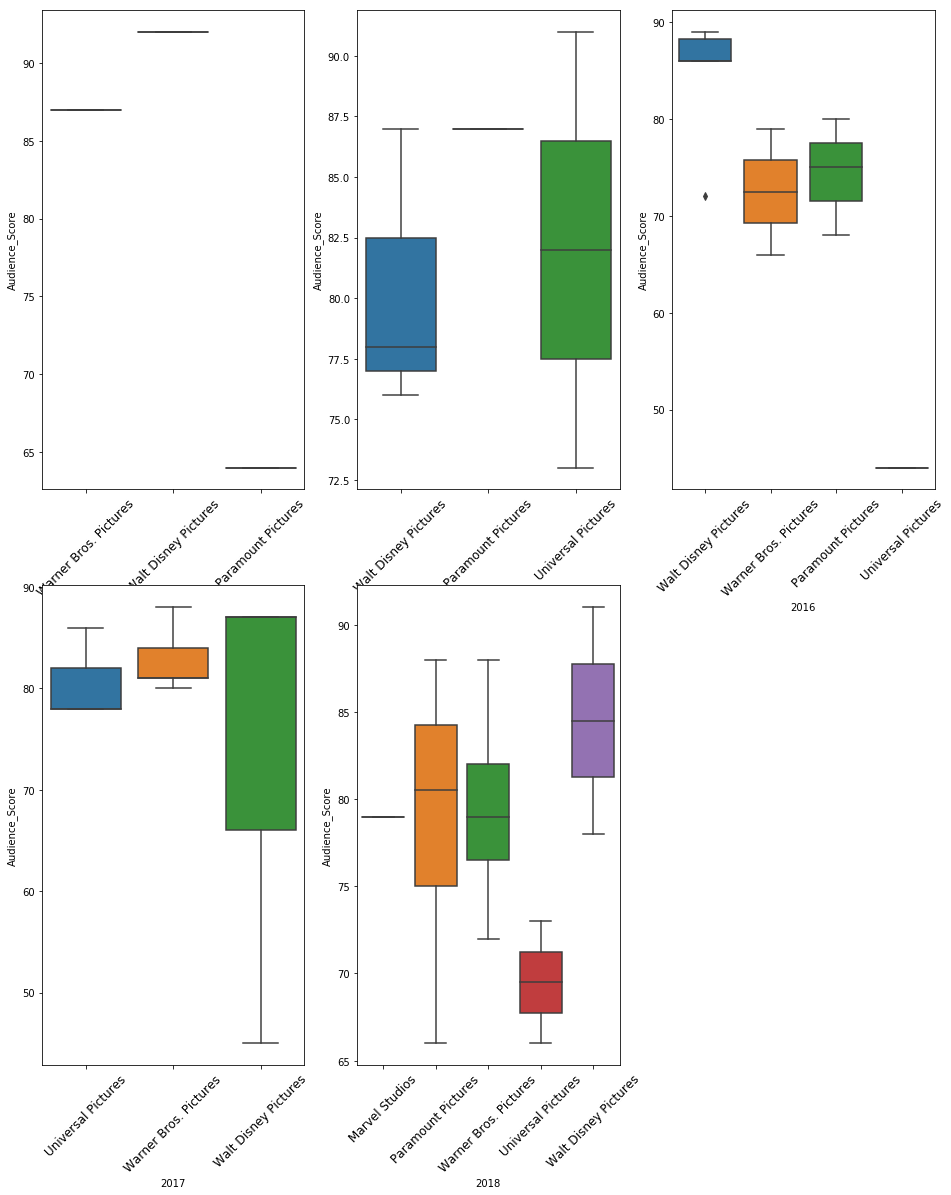

In [67]:
yearList=['0','2014','2015','2016','2017','2018']
fig=plt.figure(figsize=(16,30))
fig.subplots_adjust(hspace=0.2,wspace=0.2)
for i in range(1,len(yearList)):
    DTFrame = PlotSeries(yearList[i])
    #print(DTFrame)
    DTFrame.columns=['Studio_Names','Audience_Score']
    DTFrame.Audience_Score = DTFrame.Audience_Score.replace('%','',regex=True).astype('int')
    ax=fig.add_subplot(3,3,i)
    ax=sns.boxplot(x=DTFrame['Studio_Names'],y=DTFrame['Audience_Score'])
    plt.xlabel(yearList[i])
    plt.xticks(fontsize=12,rotation=45)
    plt.savefig('Movie_Review_3.png')
    #plt.show()
#,  

## According to the above analysis here are few points:
### 1. In 2012, Only Waner Bros. Pictures has been able to capture a lot of audience_score. The films have been productive .
### 2.In 2013 and 2014, not many audience have appreciated the movies of Warner , Walt Disney Pictures
### 3.In 2015, it is the time for Walt Disney pictures as they have been able to grab a lot of audience score. The films should be remarkable
### 4.In 2017, only Warner has got a lot of audience reponse
### 5.In 2018 ,Universal Pictures is least appreciated while Walt Disney is highly granted by the audience

## The below analysis is to find out whether the two datas are randomly taken or are they reliable.

In [40]:
DTFrame2018 = PlotSeries('2018')
from scipy.stats import ttest_ind
#print(DTFrame)
DTFrame2018.columns=['Studio_Names','Audience_Score']
DTFrame2018.Audience_Score = DTFrame2018.Audience_Score.replace('%','',regex=True).astype('int')
display(DTFrame2018)

,Studio_Names,Audience_Score
0,Marvel Studios,79
0,Paramount Pictures,88
0,Warner Bros. Pictures,80
0,Paramount Pictures,83
0,Warner Bros. Pictures,88
0,Universal Pictures,66
0,Walt Disney Pictures,78
0,Warner Bros. Pictures,78
0,Walt Disney Pictures,91
0,Paramount Pictures,78


In [41]:
DTFrame2017 = PlotSeries('2017')
from scipy.stats import ttest_ind
#print(DTFrame)
DTFrame2017.columns=['Studio_Names','Audience_Score']
DTFrame2017.Audience_Score = DTFrame2017.Audience_Score.replace('%','',regex=True).astype('int')
display(DTFrame2017)

,Studio_Names,Audience_Score
0,Universal Pictures,86
0,Warner Bros. Pictures,88
0,Warner Bros. Pictures,81
0,Walt Disney Pictures,45
0,Walt Disney Pictures,87
0,Warner Bros. Pictures,81
0,Warner Bros. Pictures,80
0,Walt Disney Pictures,87
0,Warner Bros. Pictures,84
0,Universal Pictures,78


Ttest_indResult(statistic=2.484270789853766, pvalue=0.021078072962328408)


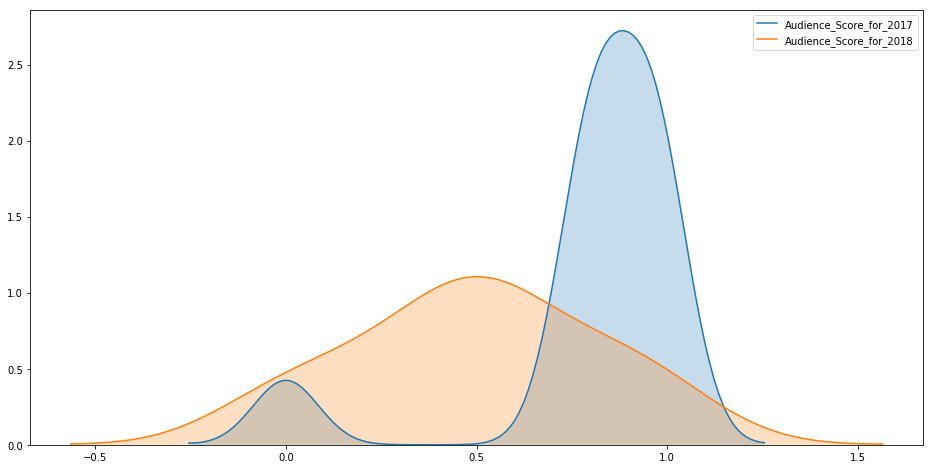

In [51]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0,1))
#DTFrame2017['Audience_Score'] = scaler.fit_transform(np.array(DTFrame2017['Audience_Score']).astype('float').reshape(-1,1))
#DTFrame2018['Audience_Score'] = scaler.fit_transform(np.array(DTFrame2018['Audience_Score']).astype('float').reshape(-1,1))
print(ttest_ind(DTFrame2017['Audience_Score'],DTFrame2018['Audience_Score']))
plt.figure(figsize=(16,8))
sns.kdeplot(DTFrame2017['Audience_Score'],label='Audience_Score_for_2017',shade=True)
sns.kdeplot(DTFrame2018['Audience_Score'],label='Audience_Score_for_2018',shade=True)
plt.legend()
plt.show()

### So, from the above analysis , we come into a conclusion that the p_value for both of the two datasets is significantly low ,much lower than 0.05. p_value of 0.05 says thet there is a 5 % chance that the data is random and there is a real difference. T value relates the size of the differences. Now the p_value that we are getting is approximately 2% which is way lower than 5% . Henceforth we can infer conclusively that there is 2% chance that the data is random.
